## Direct Methods for the solution of Linear Systems

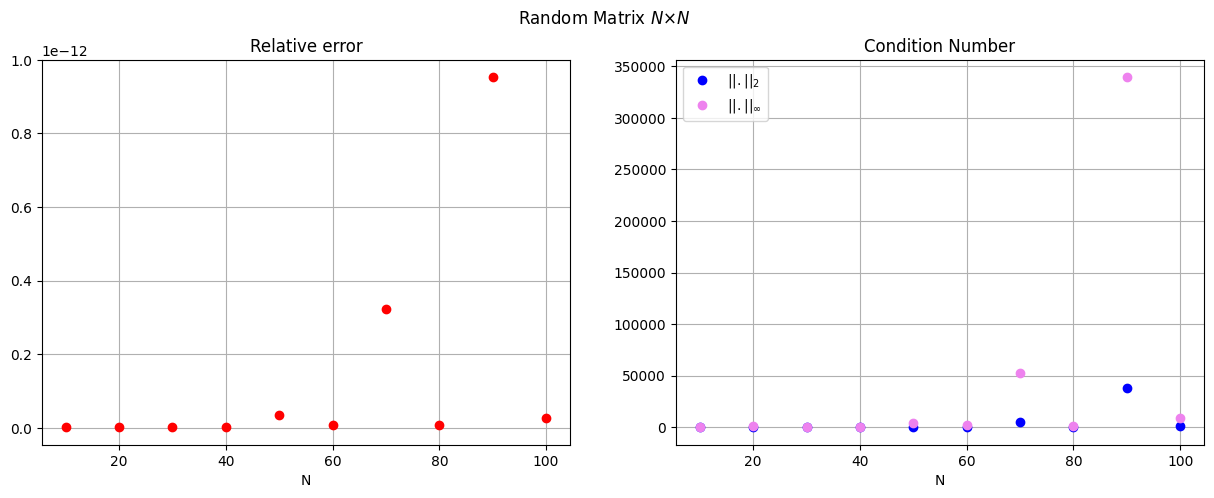

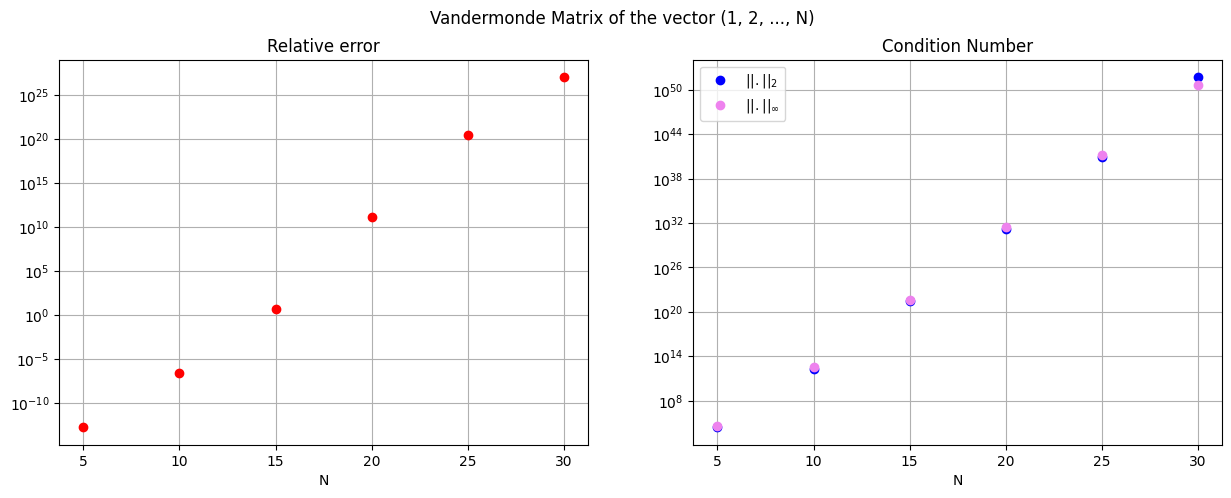

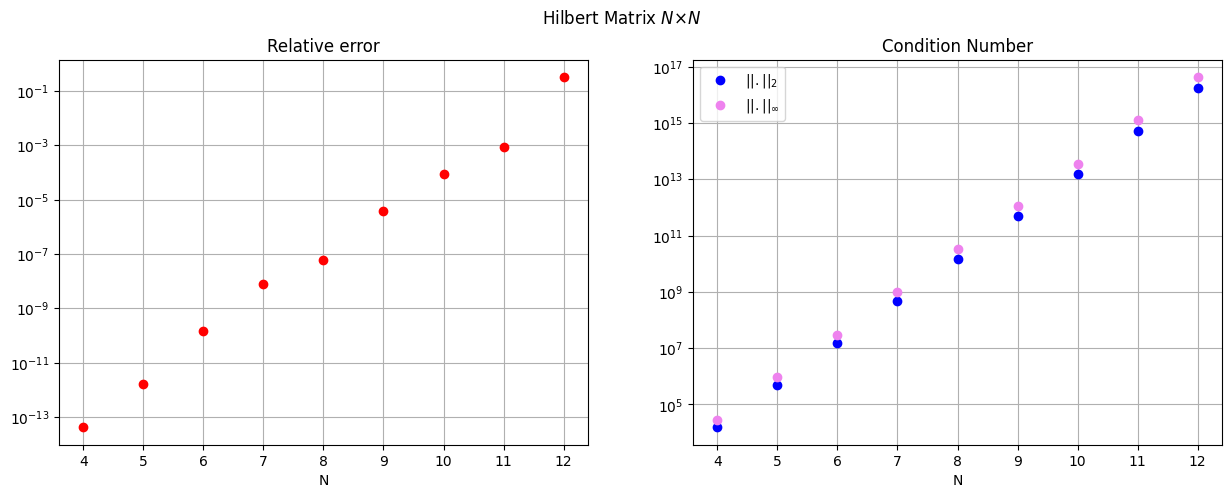

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy


dict_of_N = {   1: np.arange(10, 101, 10),  \
                2: np.arange( 5,  31,  5),  \
                3: np.arange( 4,  13)       }

dict_of_A_gen = {   1: lambda n: np.random.randn(n, n),             \
                    2: lambda n: np.vander(np.linspace(1, n, n, dtype = float)),   \
                    3: lambda n: scipy.linalg.hilbert(n)            }

dict_of_titles = {  1: "Random Matrix $N \u00D7 N$",             \
                    2: "Vandermonde Matrix of the vector (1, 2, ..., N)",    \
                    3: "Hilbert Matrix $N \u00D7 N$"  }

for key in range(1, 4):
    N = dict_of_N[key]

    E = np.zeros_like(N, dtype = float)
    C2 = np.zeros_like(N, dtype = float)
    Cinf = np.zeros_like(N, dtype = float)


    A_gen = dict_of_A_gen[key]

    for i, n in enumerate(N):
        A = A_gen(n)
        x_true = np.ones((n,))
        b = A@x_true

        x = np.linalg.solve(A, b)
        
        E[i] = np.linalg.norm(x - x_true, 2) / np.linalg.norm(x_true, 2)
        C2[i] = np.linalg.cond(A, 2)
        Cinf[i] = np.linalg.cond(A, np.Inf)


    plt.figure(figsize=(15, 5))
    plt.suptitle(dict_of_titles[key])
    plt.subplot(1, 2, 1)
    plt.plot(N, E, 'o', color='red')
    plt.title("Relative error")
    plt.xlabel("N")
    if key != 1: plt.yscale("log")
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(N, C2, 'o', color='blue')
    plt.plot(N, Cinf, 'o', color='violet')
    plt.title("Condition Number")
    plt.xlabel("N")
    plt.legend(["$|| .||_2$", "$|| .||_\infty$"])
    if key != 1: plt.yscale("log")
    plt.grid()


plt.show()


## Floating Point Arithmetic

In [34]:

print(np.finfo(float).eps)
x = 1.5

while (x>1.):
    if(np.sqrt(x) == 1.):
        e = x - 1
    x=np.sqrt(x)
print(e)

eps = 1
while(1. + eps != 1.):
    if(1. + eps/2 == 1.):
        break
    eps = eps / 2
print(eps)


2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16


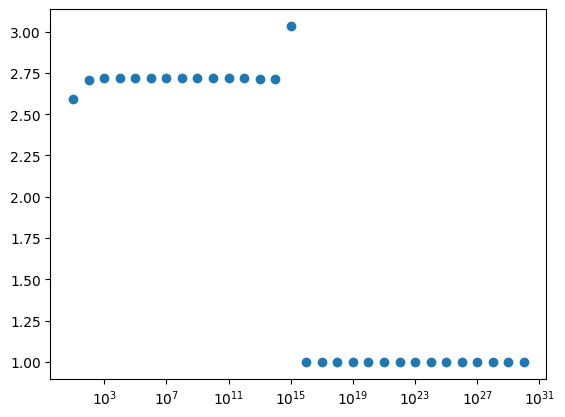

In [11]:
def a(n):
    return (1+1/n)**n

showerror = False

N = 30
n = np.linspace(1, N , N)
x = 10**n
y = a(x)

plt.plot(x, y, "o")
if showerror:
    e = np.e - a(x)
    plt.plot(x, e, "o")
plt.xscale("log")

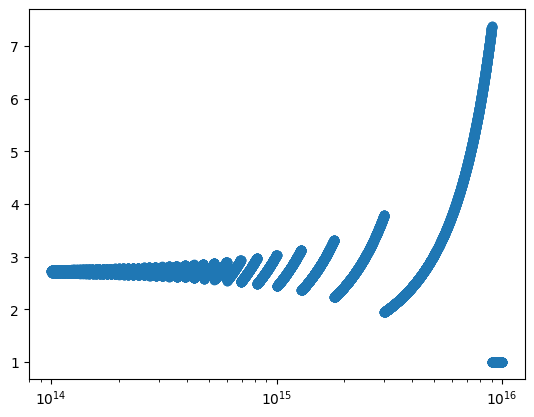

In [14]:
N = 30
n = np.linspace (14,16, 10000)

x = 10**n
y = a(x)

plt.plot(x, y, "o")
if showerror:
    e = np.e - a(x)
    plt.plot(x, e, "o")
plt.xscale("log")

In [12]:
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

print("Matrix A\nRank = ", np.linalg.matrix_rank(A), "\nEigenvalues = ", np.linalg.eigvals(A))
print("\nMatrix B\nRank = ", np.linalg.matrix_rank(B), "\nEigenvalues = ", np.linalg.eigvals(B))


Matrix A
Rank =  2 
Eigenvalues =  [5. 2.]

Matrix B
Rank =  1 
Eigenvalues =  [5. 0.]
